# Продажи видеоигр

Работу выполнили:

Ким Артём K3222

Андреев Николай K3221

##В этом датасете содержатся данные о видеоиграх, продажи которые превзошли 100 000 копий. Данные были сгенерированы при помощи vgchartz.com. Сам же датасет взят с сайта kaggle.com

*   Rank - Рейтинг суммарных продаж
*   Name - Название игры
*   Platform - Платформа выпуска игры (такие как PC, PS4, и т.д.)
*   Year - Год выпуска
*   Genre - Жанр игры
*   Publisher - Издательство
*   NA_Sales - Продажи в Северной Америке
*   EU_Sales - Продажи в Европе
*   JP_Sales - Продажи в Японии
*   Other_Sales - Продажи в остальных частях мира
*   Global_Sales - Суммарные продажи

Все данные по продажам представлены в миллионах

In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
vgsales <- read.csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1WFmK_FQchoXto0GcKz2lL6NNtOHEz3WZ')

In [ ]:
vgsales <- na.omit(vgsales)
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


##**Гипотеза:** Самый успешный по продажам издатель - Nintendo

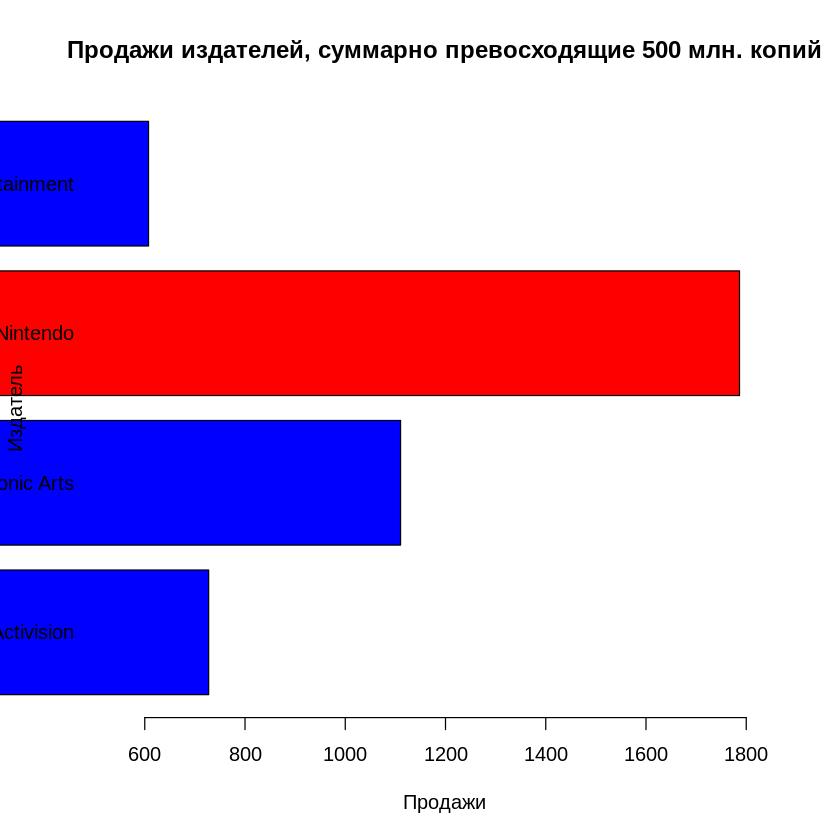

In [ ]:
vgsale <- vgsales

vgsale <- vgsale %>%
          group_by(Publisher) %>%
          summarise(Total_Sales = sum(Global_Sales))

max_sales <- max(vgsale$Total_Sales)

vgsale <- vgsale[vgsale$Total_Sales > 500, ]

min_sales <- min(vgsale$Total_Sales)

RedBluePalette = list()
for (i in 1:nrow(vgsale)) {
  if (vgsale$Total_Sales[i] == max_sales) {
    RedBluePalette <- append(RedBluePalette, '#FF0000')
  }
  else{
    RedBluePalette <- append(RedBluePalette, '#0000FF')
  }
}
RedBluePalette <- unlist(RedBluePalette, recursive = TRUE, use.names = FALSE)

barplot(vgsale$Total_Sales, names.arg = vgsale$Publisher, xlim = range((min_sales - 100) : (max_sales + 100)), ylab="Издатель", xlab="Продажи", las = 1,
        col = RedBluePalette, horiz = TRUE, main = "Продажи издателей, суммарно превосходящие 500 млн. копий")

Как видно из графиков, Nintendo, действительно - самый крупный игровой издатель

##**Гипотеза:** Самые продаваемые игры вышли из-под крыла Nintendo

`summarise()` has grouped output by 'Name'. You can override using the
`.groups` argument.


[1] "Красным цветом выделены игры издателя Nintendo, синим - других издателей с их Названием"


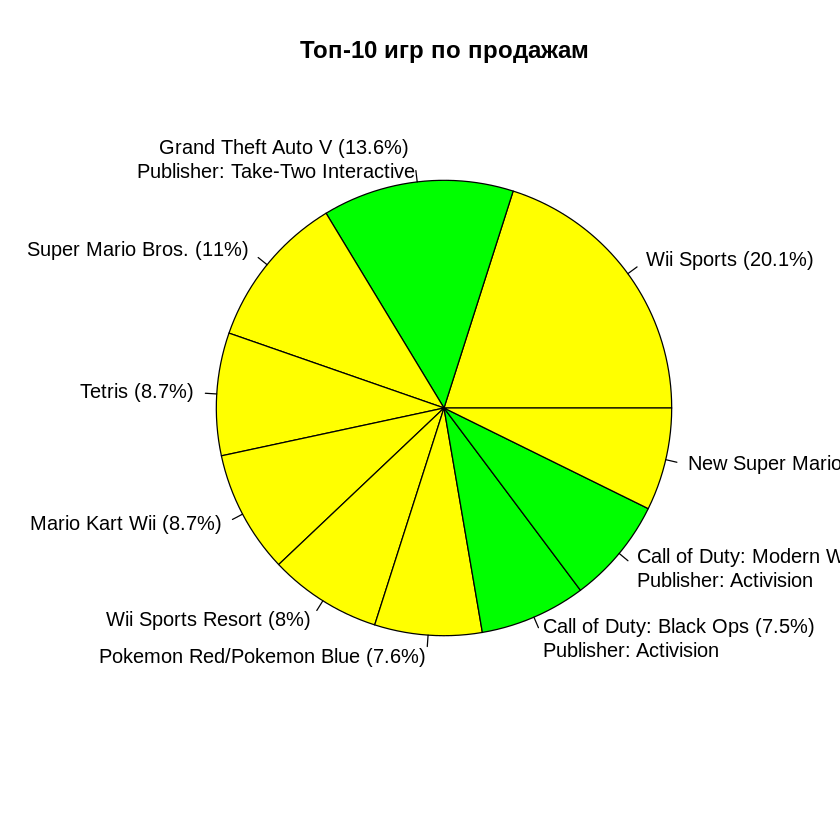

In [ ]:
vg_copy <- vgsales

vg_copy <- vg_copy %>%
            group_by(Name, Publisher) %>%
            summarise(Total_Sales = sum(Global_Sales))
vg_copy <- vg_copy[order(vg_copy$Total_Sales, decreasing = TRUE), ]
vg_copy <- head(vg_copy, 10)

MyPalette <- list()
for (i in 1:nrow(vg_copy)) {
  percentage <- 100 * vg_copy$Total_Sales / sum(vg_copy$Total_Sales)
  percentage <- round(percentage, digits = 1)
  vg_copy$Name[i] <- paste(vg_copy$Name[i], " (", percentage[i], "%)", sep = "")  
  if (vg_copy$Publisher[i] == 'Nintendo') {
    MyPalette <- append(MyPalette, '#FFFF00')
  }
  else{
    MyPalette <- append(MyPalette, '#00FF00')
    vg_copy$Name[i] <- paste(vg_copy$Name[i], '\nPublisher:', vg_copy$Publisher[i])
  }
}
MyPalette <- unlist(MyPalette, recursive = TRUE, use.names = FALSE)

print('Красным цветом выделены игры издателя Nintendo, синим - других издателей с их Названием')
pie(vg_copy$Total_Sales, labels = vg_copy$Name, col = MyPalette, main = "Топ-10 игр по продажам")

Среди десяти самых продаваемых игр: семь принадлежат издателю Nintendo

##**Гипотеза:** Суммарные продажи жанра Sports у топ-5 игр по мировым продажам этого жанра в Северной Америке больше чем в Европе

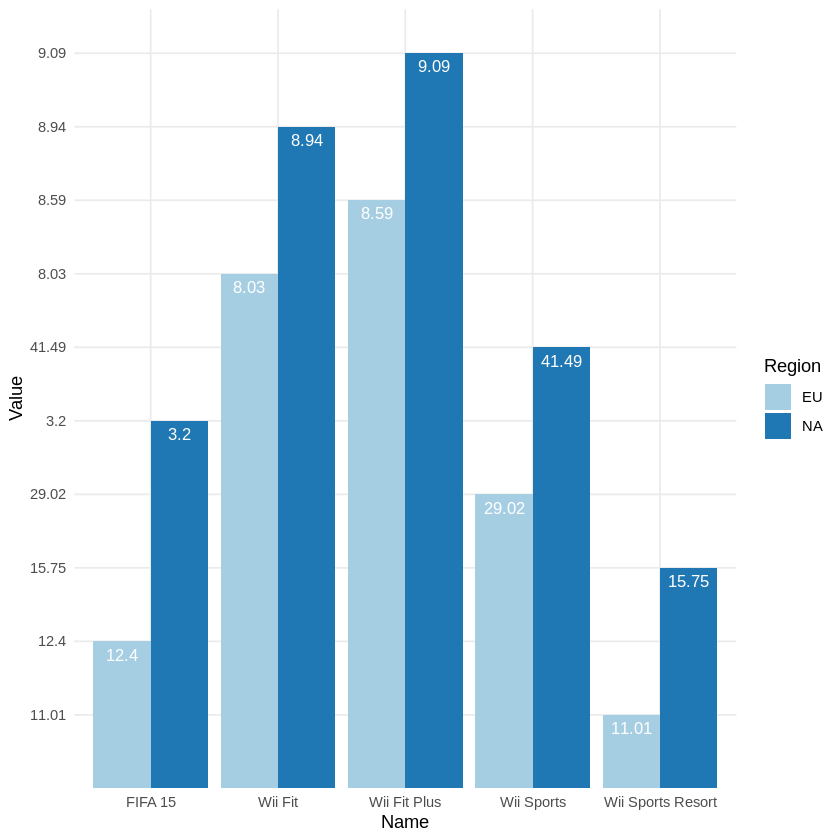

In [ ]:
vgsa <- vgsales

vgsa <- vgsa[vgsa$Genre == 'Sports', ]
vgsa <- vgsa %>%
      group_by(Name) %>%
      summarise(Total_NA = sum(NA_Sales), Total_EU = sum(EU_Sales), Total_Globe = sum(Global_Sales))
vgsa <- head(vgsa[order(vgsa$Total_Globe, decreasing = TRUE), ], 5)

eu <- vgsa$Total_EU
na <- vgsa$Total_NA

result <- data.frame(Region = character(), Name = character(), Value = double(), stringsAsFactors=TRUE)
row_names <- vgsa$Name
regions <- c('NA', 'EU') 
for (i in 1:nrow(vgsa)){
  result <- rbind(result, c(regions[1], row_names[i], na[i]))
}
for (i in 1:nrow(vgsa)){
  result <- rbind(result, c(regions[2], row_names[i], eu[i]))
}
colnames(result) <- c('Region', 'Name', 'Value')

ggplot(data = result, aes(x = Name, y = Value, fill = Region)) +
  geom_bar(stat="identity", position=position_dodge())+
  geom_text(aes(label = Value), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5)+
  scale_fill_brewer(palette="Paired")+
  theme_minimal()

График получился немного странный, но если обращать внимание на цифры, видно, что среди топ-5 игр только в FIFA15 продажи в Европе больше, чем в Америке

##**Гипотеза:** Самый продаваемый жанр в Японии - Role-Playing

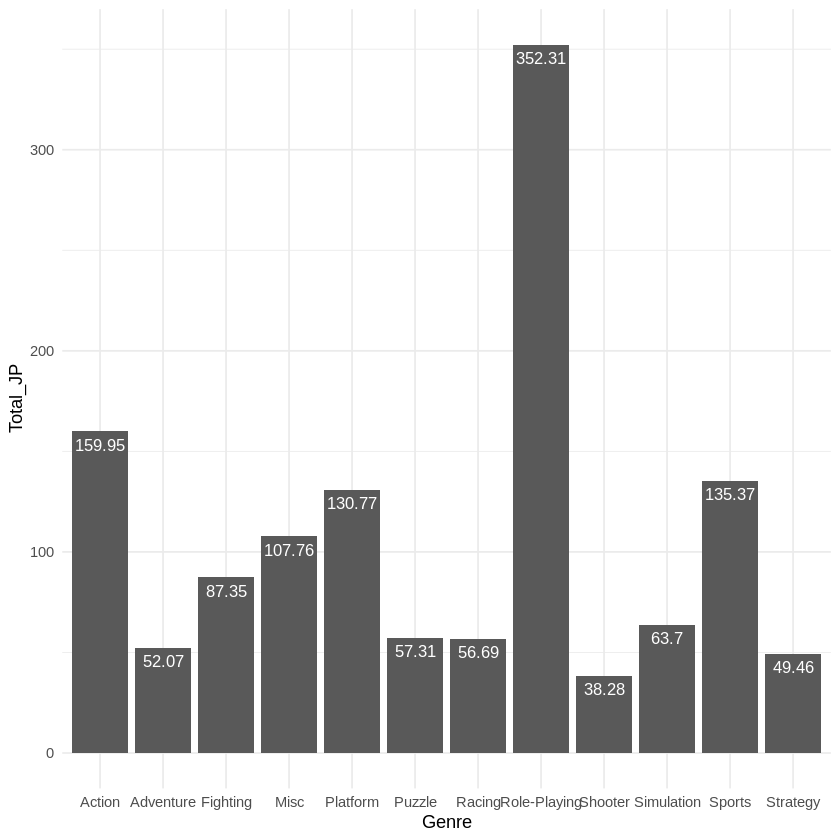

In [ ]:
vgsal <- vgsales

vgsal <- vgsal %>%
          group_by(Genre) %>%
          summarise(Total_JP = sum(JP_Sales))

ggplot(data = vgsal, aes(x = Genre, y = Total_JP)) + geom_bar(stat="identity", position=position_dodge()) +
geom_text(aes(label = Total_JP), vjust=1.6, color="white", position = position_dodge(0.9), size=3.5) + theme_minimal()

Действительно, Role-Playing с большим отрывом самый продаваемый жанр в Японии

##**Гипотеза:** самые большие продажи в жанре Shooter


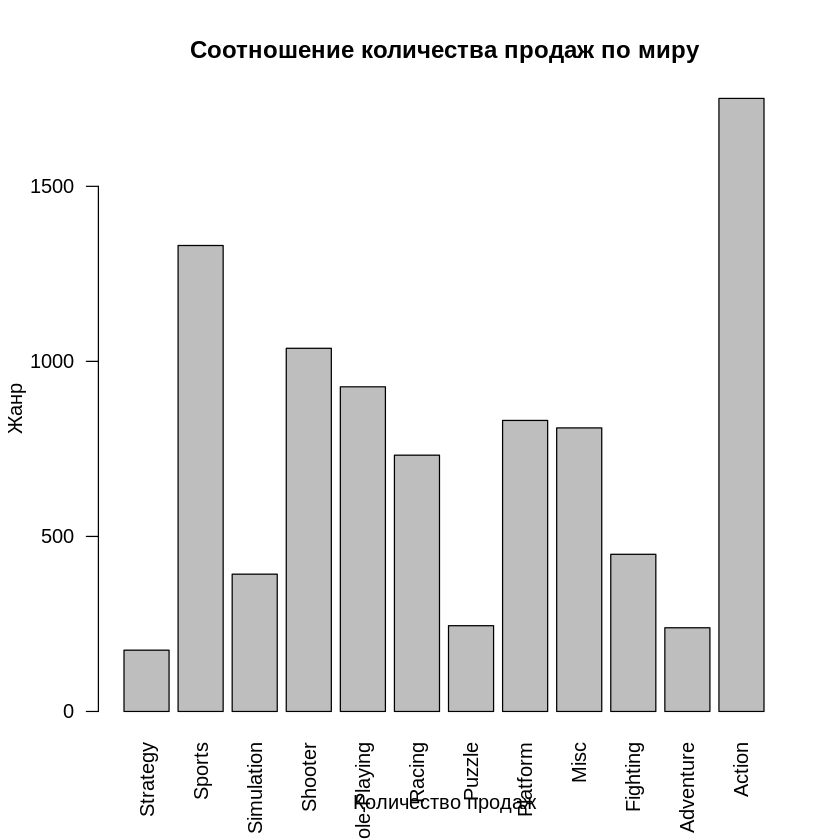

In [ ]:
vg <- vgsales
vg <- vg %>% group_by(Genre) %>% summarise(count = sum(Global_Sales))
vg <- vg[order(vg$Genre, decreasing = TRUE), ]

barplot(vg$count, names.arg = vg$Genre,
las=2, main="Соотношение количества продаж по миру",
ylab="Жанр", xlab="Количество продаж"
)

Как видно на графике, игры жанра Action по продажам сильно превышают другие жанры

##**Гипотеза:** среди игр жанра Racing самые продаваемые - серия Mario Kart

ERROR: ignored

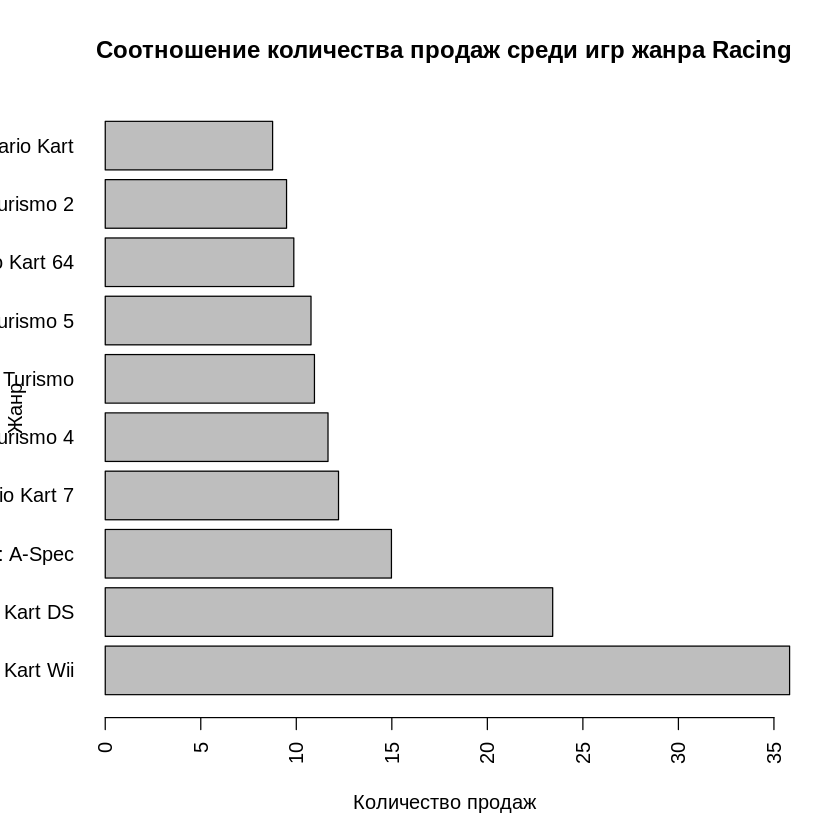

In [ ]:
vg <- vgsales
vg <- vg[vg$Genre == 'Racing', ]
vg <- vg[order(vg$Global_Sales, decreasing = TRUE), ]
vg <- head(vg, 10)

barplot(vg$Global_Sales, names.arg = vg$Name,
las=2, horiz = TRUE, main="Соотношение количества продаж среди игр жанра Racing",
ylab="Жанр", xlab="Количество продаж"
)
pass

В десятку самых продаваемых игр жанра Racing входят целых 5 игр серии Mario Kart

##**Гипотеза:** на платформе PS3 самые продаваемые игры выпустили Sony Computer Entertainment

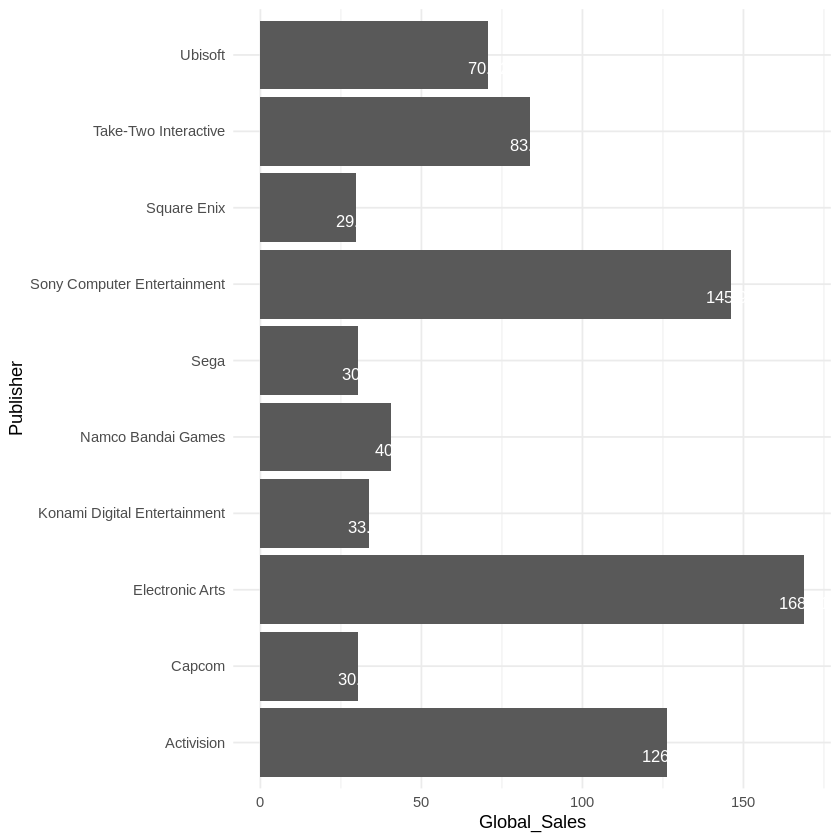

In [ ]:
vg <- vgsales
vg <- vg[vg$Platform == 'PS3', ]

vg <- vg %>% group_by(Publisher) %>% summarise(Global_Sales = sum(Global_Sales))
vg <- vg[order(vg$Global_Sales, decreasing = TRUE), ]
vg <- head(vg, 10)


ggplot(data = vg, aes(x = Global_Sales, y = Publisher)) + geom_bar(stat="identity", position=position_dodge()) +
geom_text(aes(label = Global_Sales), vjust=1.6, color="white", position = position_dodge(0.9), size=3.5) + theme_minimal()

Для PS3 больше всего продаж совершили Electronic Arts. Sony Entertaiment на втором месте. 

##**Гипотеза:** Больше всего продаж игр на консоли Wii


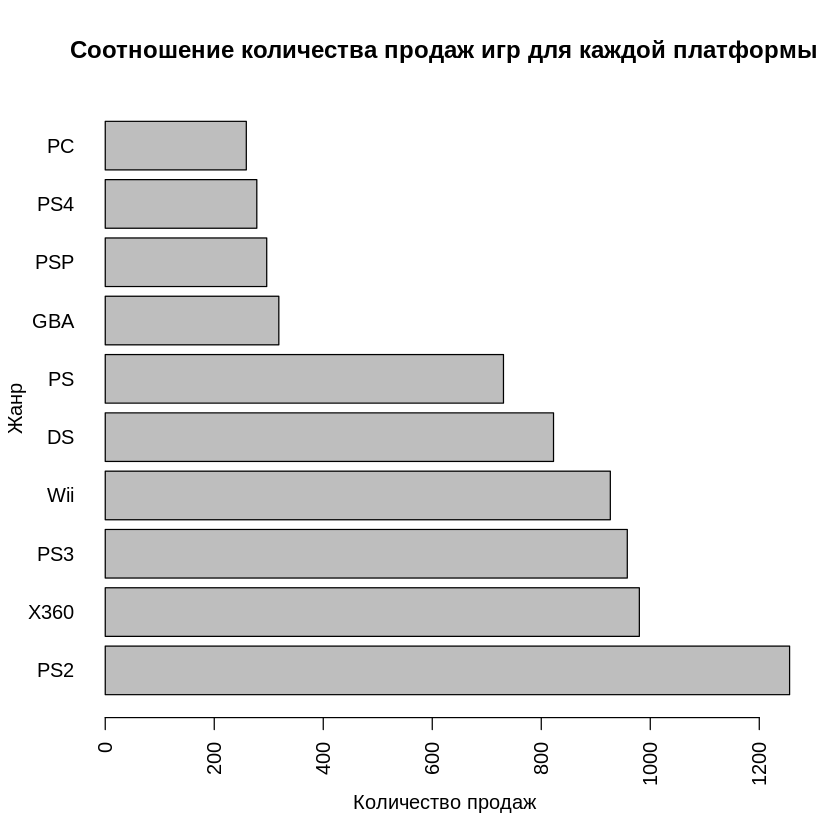

In [ ]:
vg <- vgsales
vg <- vg %>% group_by(Platform) %>% summarise(Global_Sales = sum(Global_Sales))
vg <- vg[order(vg$Global_Sales, decreasing = TRUE), ]
vg <- head(vg, 10)
barplot(vg$Global_Sales, names.arg = vg$Platform,
las=2, horiz = TRUE, main="Соотношение количества продаж игр для каждой платформы",
ylab="Жанр", xlab="Количество продаж"
)

Количество продаж для Wii находится только на 4 месте